In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [3]:
df

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


**Normalização dos Dados**

In [4]:
# correlacao entre as variaveis
df.corr()

,Peso,Altura,Cateter
Peso,1.000000,0.961094,0.904510
Altura,0.961094,1.000000,0.892787
Cateter,0.904510,0.892787,1.000000


Text(0, 0.5, 'Cateter')

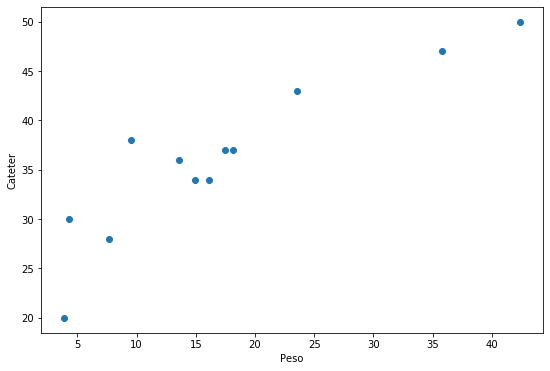

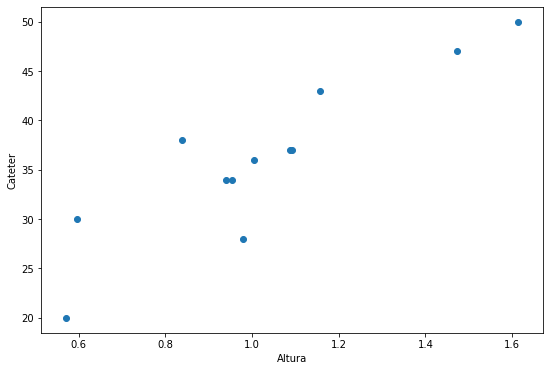

In [5]:
''' Distribuicao dos dados '''

'''
# Peso x Cateter 
figure1_log = plt.figure(figsize=(9,6))
plt.scatter(np.log(df['Peso']), np.log(df['Cateter']))
plt.xlabel('Peso')
plt.ylabel('Cateter')
'''

# Peso x Cateter 
figure1 = plt.figure(figsize=(9,6))
plt.scatter(df['Peso'], df['Cateter'])
plt.xlabel('Peso')
plt.ylabel('Cateter')

# Altura x Cateter 
figure2 = plt.figure(figsize=(9,6))
plt.scatter(df['Altura'], df['Cateter'])
plt.xlabel('Altura')
plt.ylabel('Cateter')

Normalização usando sklearn:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
new_df = pd.DataFrame(data_scaled)
new_df = new_df.to_numpy()

y_normal_sklearn = new_df[:,[-1]]
x_normal_sklearn = new_df[:,:-1]

x_normal_sklearn = np.hstack((np.ones((x_normal_sklearn.shape[0], 1)), x_normal_sklearn))

print(x_normal_sklearn)
print(y_normal_sklearn)

[[ 1.          0.07515517  0.21366613]
 [ 1.          2.21958262  2.02508821]
 [ 1.         -0.10521723 -0.25012793]
 [ 1.         -0.32567239 -0.0751113 ]
 [ 1.          0.55614824  0.44993858]
 [ 1.         -0.84674822 -0.16261962]
 [ 1.          0.01503103  0.23116779]
 [ 1.         -1.18745165 -1.56275262]
 [ 1.         -0.20542413 -0.29388208]
 [ 1.         -1.14736889 -1.47524431]
 [ 1.         -0.6864172  -0.64391534]
 [ 1.          1.63838266  1.54379249]]
[[ 0.10643117]
 [ 1.76675743]
 [-0.27672104]
 [-0.02128623]
 [ 0.8727356 ]
 [-1.04302547]
 [ 0.10643117]
 [-2.0647647 ]
 [-0.27672104]
 [-0.78759066]
 [ 0.23414857]
 [ 1.38360521]]


Normalização do zero:

In [7]:
def normalizar(x, y):
  x_normal = x / np.mean(x, axis=0)
  y_normal = y / np.mean(y)
  
  return x_normal, y_normal

dados = df.to_numpy()

x_norma = dados[:,:-1]
y_norma = dados[:,[-1]]
testex,testey = normalizar(x_norma,y_norma)

x_normal = dados[:,:-1]
# x_i dividido pela media; para cara feature (coluna)
x_normal = x_normal / np.mean(x_normal, axis=0)
x_normal = np.hstack((np.ones((x_normal.shape[0], 1)), x_normal))

y_normal = dados[:,[-1]]
media_y = np.mean(y_normal)
y_normal = y_normal / media_y  # y_i / media de y
print(x_normal)
print(y_normal)

[[1.         1.04918033 1.06049969]
 [1.         2.45245902 1.57340491]
 [1.         0.93114754 0.92917613]
 [1.         0.78688525 0.97873219]
 [1.         1.36393443 1.12740037]
 [1.         0.44590164 0.95395416]
 [1.         1.00983607 1.0654553 ]
 [1.         0.22295082 0.55750568]
 [1.         0.86557377 0.91678712]
 [1.         0.24918033 0.58228371]
 [1.         0.55081967 0.81767499]
 [1.         2.07213115 1.43712575]]
[[1.02304147]
 [1.38248848]
 [0.94009217]
 [0.99539171]
 [1.18894009]
 [0.77419355]
 [1.02304147]
 [0.55299539]
 [0.94009217]
 [0.82949309]
 [1.05069124]
 [1.29953917]]


**Gradiente Descendente**

In [8]:
def gd(x, y, training_iters=10000, learning_rate=0.01):

  w = np.zeros(x.shape[1])[np.newaxis].T

  for _ in range(training_iters):
    y_hat = pred(w, x)
    error = y_hat - y
    w = w - (learning_rate * np.mean(error * x, axis=0)[np.newaxis].T)

  return w

def pred(w, x):
  return x @ w

In [9]:
w_gd = gd(x_normal, y_normal, 1000, 0.1)
print(pred(w_gd, x_normal).T)
print(y_normal.T)

[[1.0271196  1.42501557 0.96594237 0.95717798 1.10123921 0.89186974
  1.02203961 0.72968339 0.9509874  0.74189415 0.86674602 1.31803325]]
[[1.02304147 1.38248848 0.94009217 0.99539171 1.18894009 0.77419355
  1.02304147 0.55299539 0.94009217 0.82949309 1.05069124 1.29953917]]


**GRADIENTE DESCENDENTE ESTOCASTICO**

In [10]:
def gde(x, y, training_iters=10000, learning_rate=0.01, batch_size=10):
  import random

  w = np.zeros(x.shape[1])[np.newaxis].T

  for _ in range(training_iters):
    
    # pos de inicio do lote
    offset = random.randint(0, x_normal.shape[0] - batch_size)
    # pega as linhas de x da posicao offset a posicao offset+batch_size
    batch_x = x[offset:(offset + batch_size), :]
    # pega as linhas de y da posicao offset a posicao offset+batch_size
    batch_y = y[offset:(offset + batch_size)]

    y_hat = pred(w, batch_x)
    error = y_hat - batch_y
    w = w - (learning_rate * np.mean(error * batch_x, axis=0)[np.newaxis].T)

  return w

def pred(w, x):
  return x @ w

In [11]:
w_gde = gde(x_normal, y_normal, 1000, 0.1)
print(pred(w_gde, x_normal).T)
print(y_normal.T)

[[1.02429404 1.44820351 0.96222706 0.94928245 1.10495727 0.87618305
  1.01820002 0.71450083 0.94588604 0.72697418 0.85557529 1.33413056]]
[[1.02304147 1.38248848 0.94009217 0.99539171 1.18894009 0.77419355
  1.02304147 0.55299539 0.94009217 0.82949309 1.05069124 1.29953917]]


**REGRESSÃO LINEAR ANALÍTICA**

MÉTODO DOS MÍNIMOS QUADRADOS (OLS)

In [12]:
def ols(x, y):
  from numpy.linalg import inv
  return inv(x.T @ x) @ x.T @ y

In [13]:
w_ols = ols(x_normal, y_normal)
print(pred(w_ols, x_normal).T)
print(y_normal.T)

[[1.02413486 1.42743567 0.96947438 0.95206809 1.10327283 0.87755248
  1.01737469 0.73940696 0.95335149 0.7505178  0.86663828 1.31877246]]
[[1.02304147 1.38248848 0.94009217 0.99539171 1.18894009 0.77419355
  1.02304147 0.55299539 0.94009217 0.82949309 1.05069124 1.29953917]]


**Comparação dos algoritmos:**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ln = LinearRegression()
ln.fit(x_normal, y_normal)

y_pred = ln.predict(x_normal)
y_pred_zero_gd = pred(w_gd, x_normal)
y_pred_zero_gde = pred(w_gde, x_normal)
y_pred_zero_ols = pred(w_ols, x_normal)

rmse = np.sqrt(mean_squared_error(y_normal, y_pred))
rmse_zero_gd = np.sqrt(mean_squared_error(y_normal, y_pred_zero_gd))
rmse_zero_gde = np.sqrt(mean_squared_error(y_normal, y_pred_zero_gde))
rmse_zero_ols = np.sqrt(mean_squared_error(y_normal, y_pred_zero_ols))

print('Regressão Linear usando sklearn: ', rmse)
print('Regressão Linear Simples GD do zero: ', rmse_zero_gd)
print('Regressão Linear Simples GDE do zero: ', rmse_zero_gde)
print('Regressão Linear Simples OLS do zero: ', rmse_zero_ols)

# soma dos erros ao quadrado
print(np.sum((y_pred.T[0] - y_normal.T[0])**2))
print(np.sum((pred(w_gd, x_normal).T[0] - y_normal.T[0])**2))
print(np.sum((pred(w_gde, x_normal).T[0] - y_normal.T[0])**2))
print(np.sum((pred(w_ols, x_normal).T[0] - y_normal.T[0])**2))

Regressão Linear usando sklearn:  0.09047253223367169
Regressão Linear Simples GD do zero:  0.09068381133078371
Regressão Linear Simples GDE do zero:  0.09142800720508794
Regressão Linear Simples OLS do zero:  0.0904725322336717
0.09822334906527315
0.09868264364972612
0.10030896601792334
0.09822334906527318


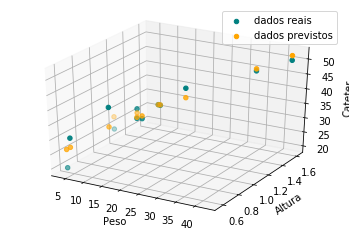

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Peso'], df['Altura'], df['Cateter'],
           color='teal', label='dados reais')
ax.scatter(df['Peso'], df['Altura'], pred(w_gd, x_normal) * media_y,
           color='orange', label='dados previstos')

ax.set_xlabel('Peso')
ax.set_ylabel('Altura')
ax.set_zlabel('Cateter')

ax.legend()

plt.show()

In [16]:
from sklearn.datasets import load_boston

x, y = load_boston(return_X_y=True)
y = y[np.newaxis].T
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
